In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt #plotting library
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#set threshold to infinity
np.set_printoptions(threshold=np.inf)
%matplotlib inline
plt.rcParams['figure.figsize']=(20,20)
prime= pd.read_csv('PRIME.csv', encoding='unicode_escape')

In [3]:
prime.head()

,Sno,Nameoftheshow,Year of release,No of seasons available,Language,Genre,IMDbrating,Age of viewers,combined features
0,1,Pataal Lok,2020,1,Hindi,Drama,7.5,18+,NaN
1,2,Upload,2020,1,English,Sci-fi comedy,8.1,16+,NaN
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+,NaN
3,4,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+,NaN
4,5,Fleabag,2016,2,English,Comedy,8.7,18+,NaN


In [4]:
# Replace using median 
median = prime['IMDbrating'].median()
prime['IMDbrating'].fillna(median, inplace=True)

In [5]:
prime.isnull().sum() #combined featurs is an extra column which will be used further

Sno                          0
Nameoftheshow                0
Year of release              0
No of seasons available      0
Language                     0
Genre                        0
IMDbrating                   0
Age of viewers               0
combined features          503
dtype: int64

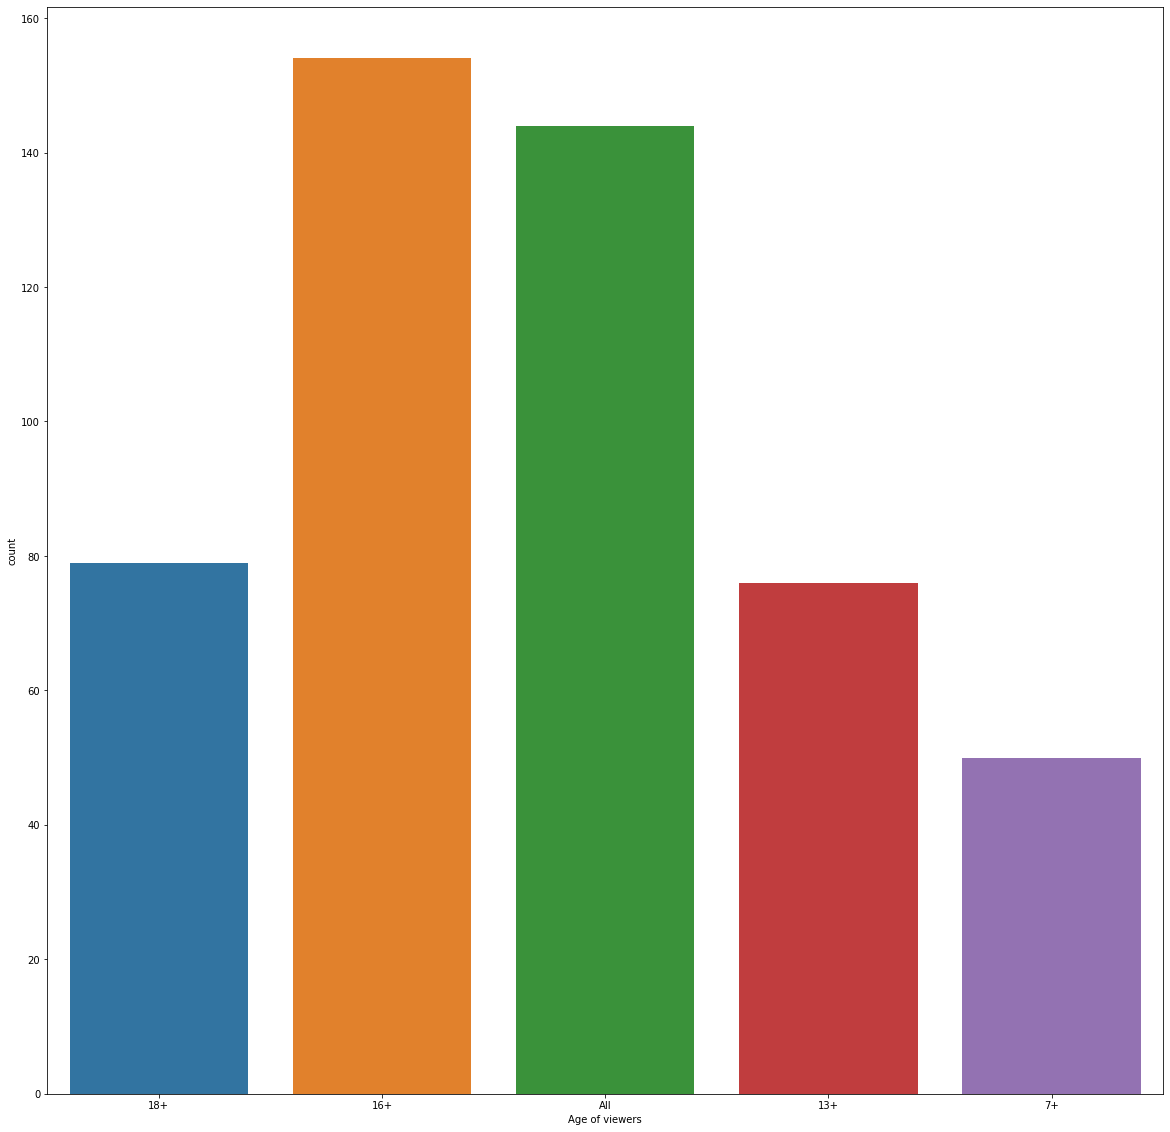

In [6]:
ax = sns.countplot(x = "Age of viewers", data = prime) #AGE OF VIEWERS:

In [7]:
#most of the shows are rated 16+

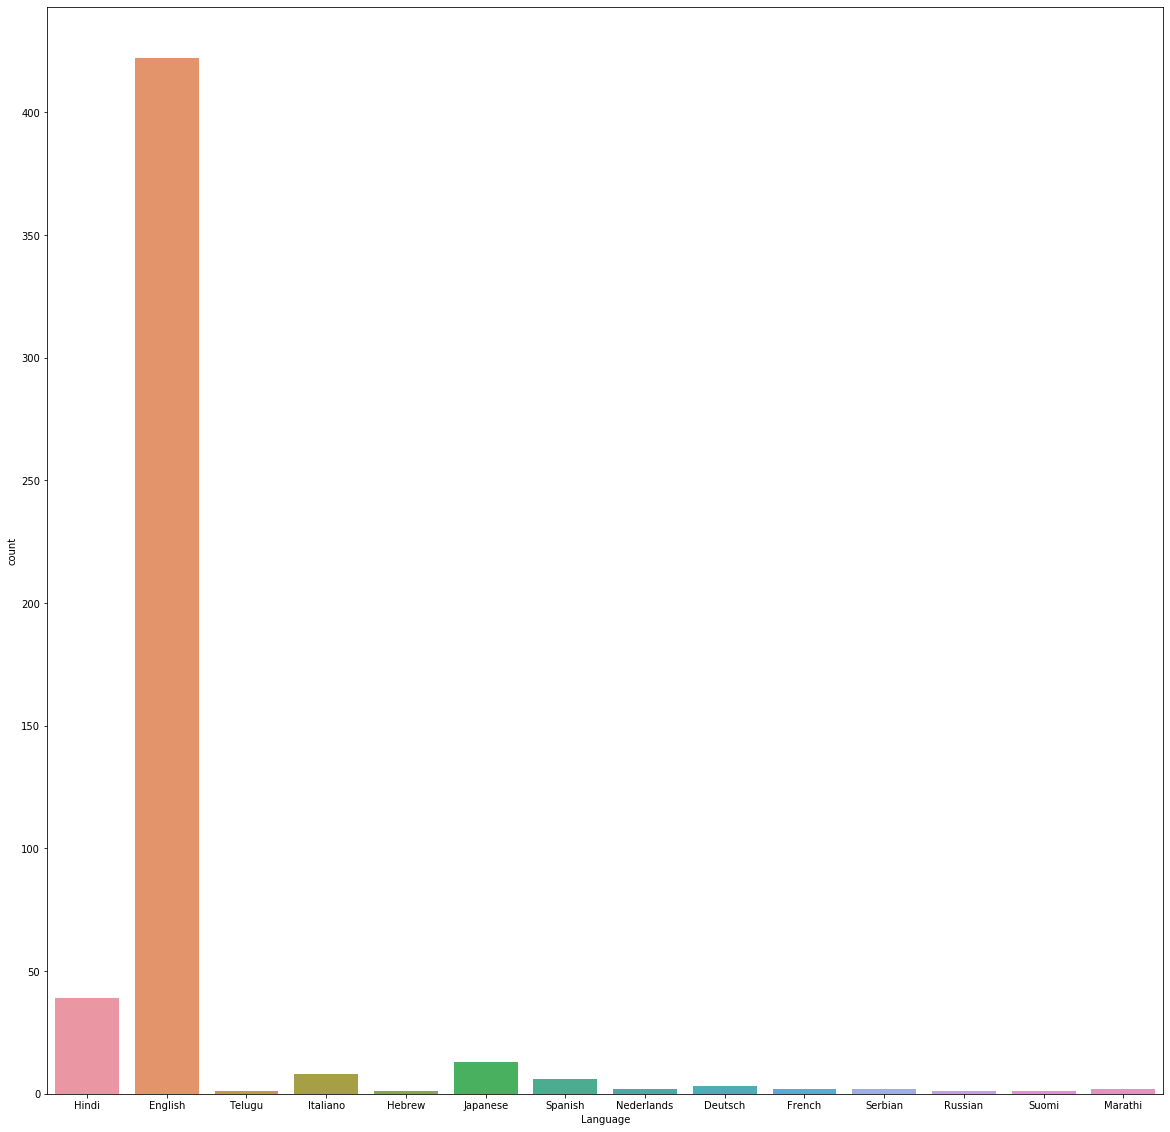

In [8]:
a2=sns.countplot(x='Language',data=prime)

In [9]:
#Most of the shows are in ENGLISH followed by Hindi

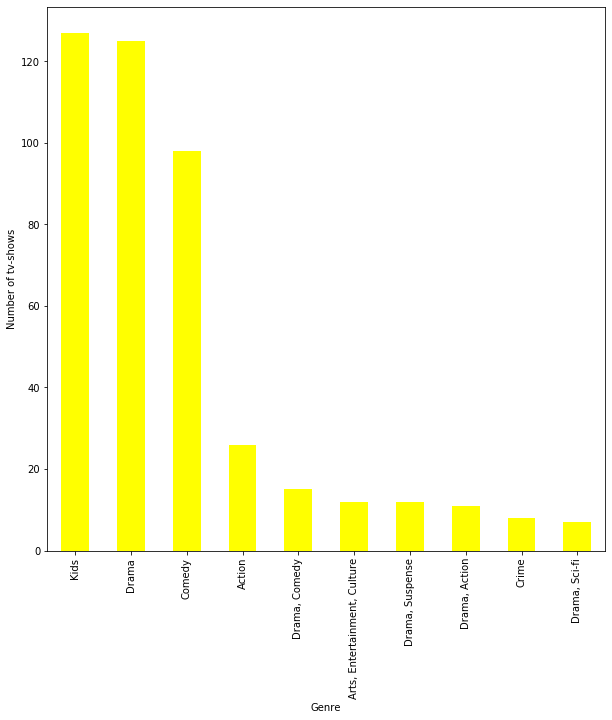

In [10]:
#lets check for Genre:
genre= prime.groupby('Genre').count()
genre.sort_values(by='Sno')
genre_top=genre.nlargest(10, 'Sno')
graph2= genre_top['Sno'].plot(kind='bar', figsize=(10,10),color='yellow')
plt.ylabel('Number of tv-shows')
plt.xlabel('Genre')
plt.show()


In [11]:
#Most of the shows are grouped under kids, drama and comedy category

In [12]:
# Let us take a look at the top 20 high rated shows on Amazon Prime
prime.sort_values(by = "IMDbrating", ascending = False).head(20)

,Sno,Nameoftheshow,Year of release,No of seasons available,Language,Genre,IMDbrating,Age of viewers,combined features
20,21,The Test: A New Era for Australia's Team,2020,1,English,Documentary,9.0,16+,NaN
281,282,Seinfeld,1990,9,English,Comedy,8.8,13+,NaN
49,50,Downtown Abbey,2010,6,English,Drama,8.7,7+,NaN
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+,NaN
37,38,Hostel Daze,2019,1,Hindi,"Drama, Comedy",8.7,16+,NaN
4,5,Fleabag,2016,2,English,Comedy,8.7,18+,NaN
340,341,The Grand Tour,2017,4,English,Sports,8.7,16+,NaN
51,52,This is Us,2017,3,English,Drama,8.7,16+,NaN
12,13,The Boys,2019,1,English,"Action, Comedy",8.7,18+,NaN
40,41,Dexter,2006,8,English,Drama,8.6,18+,NaN


In [13]:
#Data Analysis is complete. Lets start with recommendation system
features=['Genre','Language']

In [14]:
#defining a function to combine featueres:
def combine_features(row):
    return row['Genre'] +" "+row['Language']

In [15]:
prime['combined_features'] = prime.apply(combine_features,axis=1)

In [16]:
cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(prime["combined_features"]) #feeding combined strings(show contents) to CountVectorizer() object

In [17]:
#Creating a helper function to get Name of the show from Sno 
def get(Sno):
    return prime[prime.Sno==Sno]['Nameoftheshow'].values[0]

In [18]:
#Creating a helper function to get Sno from name of the show
def get_index(Nameoftheshow):
    return prime[prime.Nameoftheshow==Nameoftheshow]['Sno'].values[0]

In [19]:
cosine_sim = cosine_similarity(count_matrix)#obtaining a similar matrix:(since A is similar to B matrix in the same way B is similar to A, thus obtaining a similar matrix)
#Input the name of the show:
show_user_likes= input("Enter the name of the show: ")

show_index = get_index(show_user_likes)

similar_shows = list(enumerate(cosine_sim[show_index]))

sorted_similar_shows = sorted(similar_shows,key=lambda x:x[1],reverse=True)[1:]
i=0
print("Top 5 similar shows to "+show_user_likes+" are:\n")
for element in sorted_similar_shows:
    print(get(element[0]))
    i=i+1
    if i>=5:
        break

Enter the name of the show: The Office
Top 5 similar shows to The Office are:

The Path
Queen Sugar
Which Way To 
Young Sheldon
The Big Bang Theory


In [20]:
#The above method uses the sklearn library.Another method of developing a basic system is just by data analysis and defining a function as below:

In [21]:
prime.set_index('Nameoftheshow', inplace=True)
def recommendations(liked):
    language=prime.loc[liked,'Language']
    genre=prime.loc[liked,'Genre']
    Age=prime.loc[liked,'Age of viewers']
    r1=prime[prime['Language']==language]
    r2=r1[r1['Age of viewers']==Age]
    r3=r2[r2['Genre']==genre]
    return(r3.index.tolist())

In [22]:
recommendations('The Big Bang Theory')

['Young Sheldon',
 'The Big Bang Theory',
 'The Office',
 'Mr. Bean: The Animated Series',
 'Psych',
 'Seinfeld',
 'Parks and Recreation',
 'Anger Management',
 'Trial and Error',
 'Jim Gaffigan: Quality Time',
 'Still Standing',
 'Short Poppies']

In [23]:
recommendations('The Family Man')

['The Family Man', 'The Forgotten Army- Azaadi ke Liye']

In [24]:
#reference: https://medium.com/code-heroku/building-a-movie-recommendation-engine-in-python-using-scikit-learn-c7489d7cb145